# Setup

In [1]:
#imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
INPUT_DIR = "../../data/input/"
OUTPUT_DIR = "../../data/output/"

# Load Data

In [3]:
train_sets_undersample = []
train_sets_smote = []
test_sets = []

for i in range(10):
    train_sets_undersample.append( pd.read_csv(OUTPUT_DIR + "train_set{}_undersampling.csv".format(i)) )
    train_sets_smote.append(  pd.read_csv(OUTPUT_DIR + "train_set{}_smote.csv".format(i)) )
    test_sets.append( pd.read_csv(OUTPUT_DIR + "test_set{}.csv".format(i)) )

# Define the Model

In [4]:
def create_model():
    new_model = LogisticRegression(penalty='l1',
                                   solver='liblinear',
                                   max_iter=10000)
    return new_model


Useful functions for extraxting x and x variables from a DataFrame:

In [5]:
def get_x(dataset: pd.DataFrame):
    return dataset.drop("Bug", axis=1)

def get_y(dataset: pd.DataFrame):
    return dataset.Bug

def split_xy(dataset: pd.DataFrame):
    return get_x(dataset), get_y(dataset)

# Train the Models

In [6]:
models_undersample = []
for ts in train_sets_undersample:
    model = create_model()
    x, y = split_xy(ts)
    model.fit(x, y)
    models_undersample.append(model)

models_smote = []
for ts in train_sets_smote:
    model = create_model()
    x, y = split_xy(ts)
    model.fit(x, y)
    models_smote.append(model)

# Evaluate the Models

Lets generate the predictions for all the models using the respective test sets and join then.

In [7]:
y_hat_undersample = np.concatenate([models_undersample[i].predict_proba(get_x(test_sets[i]))[:,1] for i in range(10)])
y_hat_smote       = np.concatenate([models_smote[i].predict_proba(get_x(test_sets[i]))[:,1] for i in range(10)])
y_test            = pd.concat([get_y(ts) for ts in test_sets], ignore_index=True)

Lets plot the ROC for our logistic regression model trained on undersampled balanced data and on SMOTE balanced data.

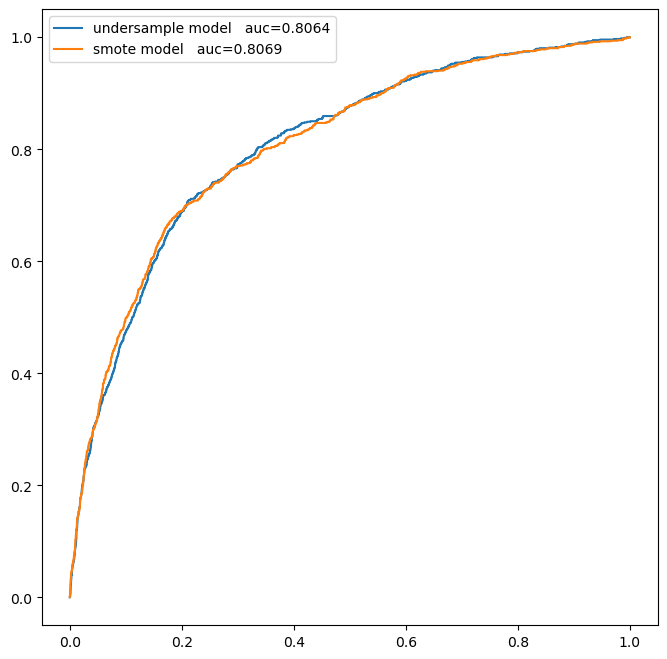

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_box_aspect(1)

fpr, tpr, thresh = roc_curve(y_test, y_hat_undersample)
auc = roc_auc_score(y_test, y_hat_undersample)
plt.plot(fpr,tpr,label="undersample model   auc={:.4f}".format(auc))

fpr, tpr, thresh = roc_curve(y_test, y_hat_smote)
auc = roc_auc_score(y_test, y_hat_smote)
plt.plot(fpr,tpr,label="smote model   auc={:.4f}".format(auc))

legend = plt.legend(loc=0)

From these metrics, we can infer that the logistic regression model trained using SMOTE balanced data and trained using undersampled data are have similar performance since they have very close AUCs. Furthermore, the unsersample model seem to be biased towards the positive relative to the smote model.